# Post processing neutral ABL

In [1]:
%%capture 

# Important header information
amrwindfedir = '/projects/wind_uq/lcheung/amrwind-frontend'         # official version
#amrwindfedir = '/ascldap/users/lcheung/local/Git/amrwind-frontend'  # My copy
import sys, os
sys.path.insert(1, amrwindfedir)

# Load the libraries
import matplotlib.pyplot as plt
import amrwind_frontend  as amrwind
import numpy             as np
from matplotlib import cm
import re

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
saveplots = False
savedir   = '../abstract/images'

## Load velocity profiles

In [3]:
# Set your run directory here
casedir = '/ascldap/users/lcheung/GPFS/2022/HFM_Q4/precursor/precursor1_5x5_uniform/'

# Average between 15,000 sec to 20,000 sec
avgtimes = [15000, 20000]

# Hub-height locations
plotheights=[150]

In [4]:
# Start the amrwind_frontend app 
case = amrwind.MyApp.init_nogui()
case.ABLpostpro_loadnetcdffile(casedir+'/post_processing/abl_statistics00000.nc')

Loading /ascldap/users/lcheung/GPFS/2022/HFM_Q4/precursor/precursor1_5x5_uniform//post_processing/abl_statistics00000.nc
Time range: 0.250000 to 20000.000000
Done.


In [5]:
# First, let's look at the hub-height averaged statistics
case.ABLpostpro_printreport(avgt=avgtimes, avgz=plotheights)

Loading w'theta'_r
Loading theta
Loading u
Loading v'v'_r
Loading v
Loading u'u'_r
Loading w'w'_r
        z       Uhoriz      WindDir       TI_TKE     TI_horiz        Alpha     ObukhovL 
      ===         ====         ====         ====         ====         ====         ==== 
   150.00 8.999995e+00 2.250013e+02 3.936348e-02 6.015296e-02 5.619135e-02 5.373473e+07 

ustar: 0.242158


{'Alpha': [array(0.05619134727762849)],
 'ObukhovL': [array(53734731.12244557)],
 'TI_TKE': [array(0.03936348479274422)],
 'TI_horiz': [array(0.06015296369088165)],
 'Uhoriz': [array(8.999994572616291)],
 'WindDir': [array(225.0012554451814)],
 'ustar': 0.24215837165068077}

## Make some plots

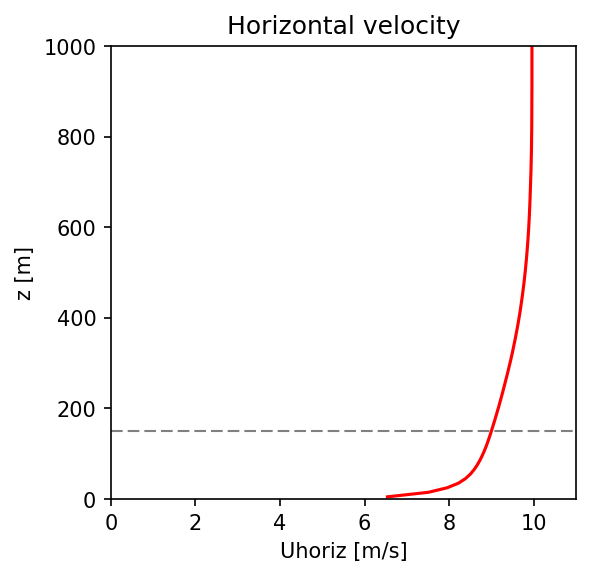

In [12]:
# Plot velocity
fig, ax = plt.subplots(figsize=(4,4), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
amrdat = case.ABLpostpro_plotprofiles(plotvars=['Uhoriz'], avgt=avgtimes)
plt.plot(amrdat['Uhoriz']['data'], amrdat['Uhoriz']['z'], color='r', label='Neutral ABL')
plt.ylim([0, 1000])
plt.xlim([0, 11])
plt.hlines(plotheights[0], 0, 11, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line
plt.xlabel('Uhoriz [m/s]')
plt.ylabel('z [m]')
plt.title('Horizontal velocity')

(0, 2000)

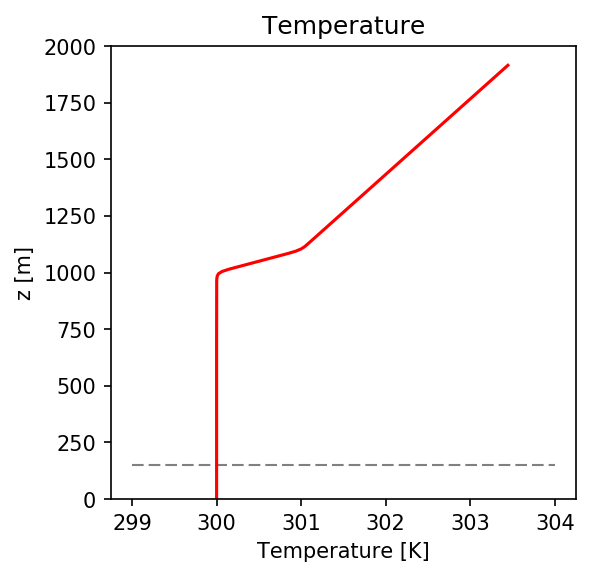

In [24]:
# Plot Temperature
fig, ax = plt.subplots(figsize=(4,4), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
amrdat = case.ABLpostpro_plotprofiles(plotvars=['Temperature'], avgt=avgtimes)
plt.plot(amrdat['T']['data'], amrdat['T']['z'], color='r', label='Neutral ABL')
#plt.ylim([0, 1000])
#plt.xlim([0, 11])
plt.hlines(plotheights[0], 299, 304, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line
plt.xlabel('Temperature [K]')
plt.ylabel('z [m]')
plt.title('Temperature')
plt.ylim([0, 2000])

(0, 2000)

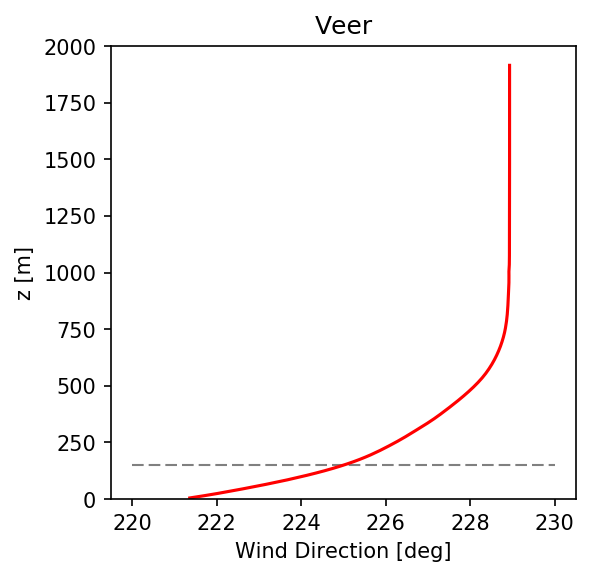

In [26]:
# Plot wind direction
fig, ax = plt.subplots(figsize=(4,4), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
amrdat = case.ABLpostpro_plotprofiles(plotvars=['WindDir'], avgt=avgtimes)
plt.plot(amrdat['WindDir']['data'], amrdat['WindDir']['z'], color='r', label='Neutral ABL')
#plt.ylim([0, 1000])
#plt.xlim([0, 11])
plt.hlines(plotheights[0], 220, 230, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line
plt.xlabel('Wind Direction [deg]')
plt.ylabel('z [m]')
plt.title('Veer')
plt.ylim([0, 2000])

## Make some contour plots

In [13]:
case.Samplepostpro_loadnetcdffile(casedir+'/post_processing/sampling00000.nc')

Loading /ascldap/users/lcheung/GPFS/2022/HFM_Q4/precursor/precursor1_5x5_uniform//post_processing/sampling00000.nc


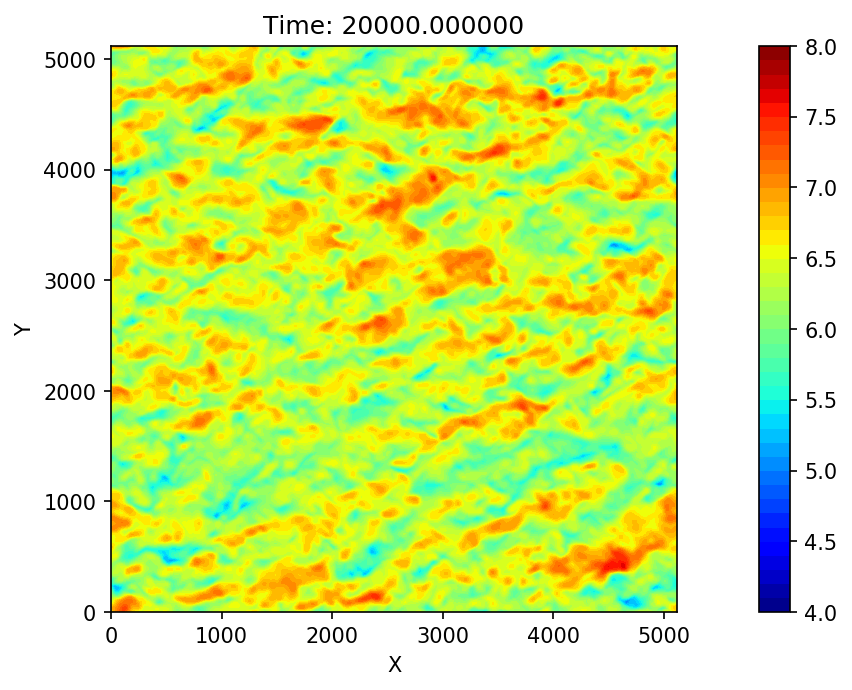

In [18]:
# Plot an image
levels=np.linspace(4,8,41)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6,5), gridspec_kw={'width_ratios': [1, 0.05]}, dpi=150)
im1 = case.plotSamplePlane('p_hub', 'velocityx', 80, 1, 'X','Y', ax=ax1, colorbar=False, levels=levels, cmap=cm.jet)
fig.colorbar(im1[0], cax=ax2)
#fig.suptitle('Small IEA29 REF1 ABL, t=15300s, z=57m, Vx')
#ax1.set_title('Base precursor run')
#ax2.set_title('Using bndry_io_mode = 1')
#ax2.get_yaxis().set_visible(False)

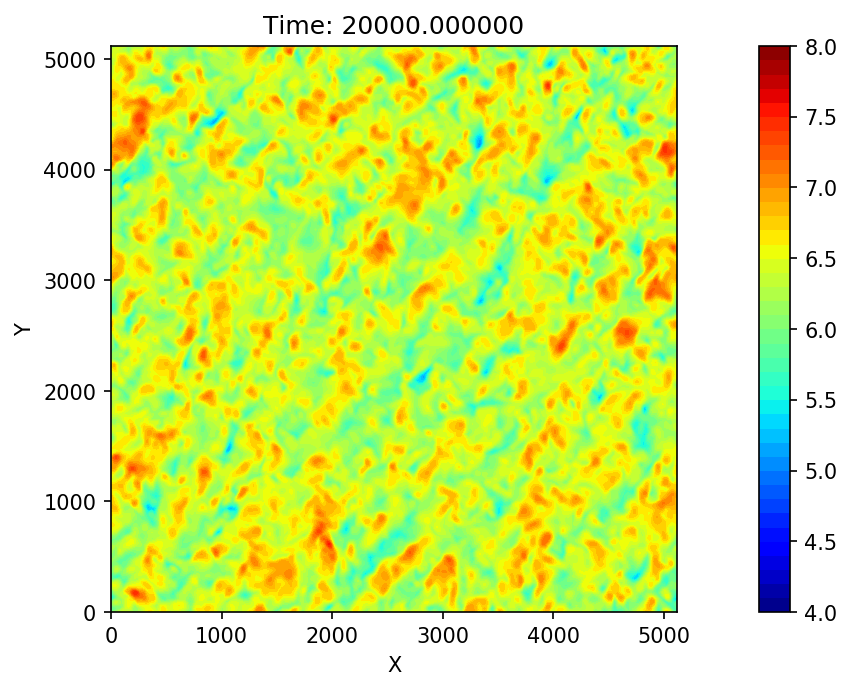

In [22]:
# Plot an image
levels=np.linspace(4,8,41)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6,5), gridspec_kw={'width_ratios': [1, 0.05]}, dpi=150)
im1 = case.plotSamplePlane('p_hub', 'velocityy', 80, 1, 'X','Y', ax=ax1, colorbar=False, levels=levels, cmap=cm.jet)
fig.colorbar(im1[0], cax=ax2)
#fig.suptitle('Small IEA29 REF1 ABL, t=15300s, z=57m, Vx')
#ax1.set_title('Base precursor run')
#ax2.set_title('Using bndry_io_mode = 1')
#ax2.get_yaxis().set_visible(False)